# Eliminación de anomalías y ajuste de intensidad en imágenes
En la presente actividad, se muestra como manejar imágenes en su forma más básica, para la eliminación de ruido y los ajustes de intensidad, En la primera sección se genera los elementos comunes, como lo son importaciones de bibliotecas e imágenes a utilizar. Así como las principales funciones que serán usadas para la visualización de imágenes y creación de anomálias. En la segunda sección tendremos los algoritmos relacionados a las prácticas de Eliminación de Ruido y se finaliza con una tercera sección sobre los algoritmos de de Ajustes de identidad. 

## Elementos Comunes

### Bibliotecas y elementos comunes

In [199]:
# Bibliotecas a utilizar.
import time
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Imagen a utilizar
img01 = 'Test01.png'
img02 = 'Test02.png'

# Lectura de imagenes
Imagen_Color =  cv.imread(img01) # OpenCV leerá la imágen en formato BGR
Imagen_Gris = cv.imread(img02, cv.IMREAD_GRAYSCALE)

# Leemos la informacion basica de las imagenes
Al1, An1, Can1 = Imagen_Color.shape
print(
        'Color:\nimg_color_alto:',Al1, 
        '\nimg_color_ancho:',An1, 
        '\nimg_color_canales:', Can1
      )

Al2, An2 = Imagen_Gris.shape
print(
        '\nGrises:\nimg_gray_alto:',Al2, 
        '\nimg_gray_ancho:',An2
      )

Color:
img_color_alto: 1080 
img_color_ancho: 1920 
img_color_canales: 3

Grises:
img_gray_alto: 1080 
img_gray_ancho: 1920


### Funciones comunes

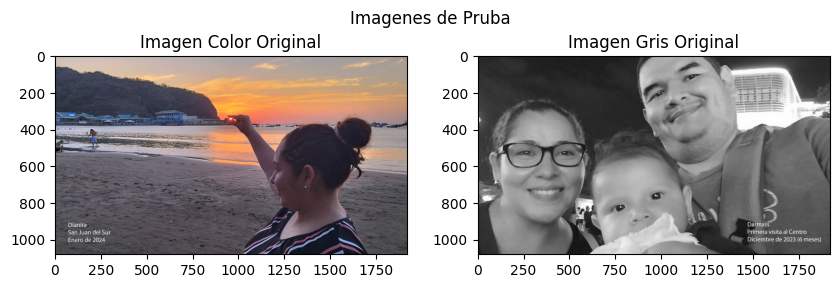

In [200]:
# Funciones para ver imagenes y controles

def medirTiempo(funcion):
    '''
    El decorado nos ayuda a medir el tiempo de ejecucion de una funcion.
    '''
    def funcionMedida(*args, **kwargs):
        inicio = time.time()
        c = funcion(*args, **kwargs)
        minutos, segundos_restantes = divmod(round(time.time() - inicio,0), 60)
        print(f"{funcion.__name__}: {int(minutos)}m{int(segundos_restantes)}s")
        return c
    return funcionMedida

def ShowImgOpenCv(img, title="Imagen"):
    '''
    Permitira enviar una imagen que ha sido leida con OpenCV en una venta de vista. 
    Mientras la ventana no se cierre, la ejecución del código desde la que se halla
    llamado se pondrá en pausa.
    '''
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

def ShowImgPlt(img, title="Imagen"):
    '''
    Utilizara elementos de Matplotlib para la visualización de la imagen
    '''
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Convertimos BGR a RGB
    plt.title(title)
    # plt.show()

def ShowImgDashboard(columnas=3, tituloDashboard="Imagenes Utilizadas", ListaImagenes=[], TitulosImagen=[]):
    '''
    Generara un conjunto de imagenes que le sean enviadas.

    columnas        Cantidad de Columnas a utilizar en el conjunto de imágenes
    tituloDashboard Titulo que se utilizará para el conjunto de imágenes
    ListaImagenes   Lista que contiene las imágenes a ser mostradas
    TitulosImagen   Titulo que se colocará a cada imagen
    '''

    # Cantidad de columnas en la figura
    c = columnas
    # Cantidad de filas en la figura
    if len(ListaImagenes)%c == 0:
        f = int(len(ListaImagenes)/c)
    else:
        f = int(len(ListaImagenes)//c+1)
        
    # Contador de itereaccion
    i = 1
    
    plt.figure(figsize=[c*5,f*3])
    plt.suptitle(tituloDashboard)
    
    for img in ListaImagenes:
        plt.subplot(f,c,i)
        ShowImgPlt(img,TitulosImagen[i-1])
        i += 1
    plt.show()

# ShowImgOpenCv(img_color,"Imagen a Colores")
# ShowImgOpenCv(img_gray,"Imagen en Escala de Grises")

# ShowImgPlt(img_color,"Imagen a Colores")
# ShowImgPlt(img_gray,"Imagen en Escala de Grises")

ShowImgDashboard(
    tituloDashboard="Imagenes de Pruba", 
    columnas=2, 
    ListaImagenes=[Imagen_Color, Imagen_Gris], 
    TitulosImagen=["Imagen Color Original","Imagen Gris Original"]
                 )


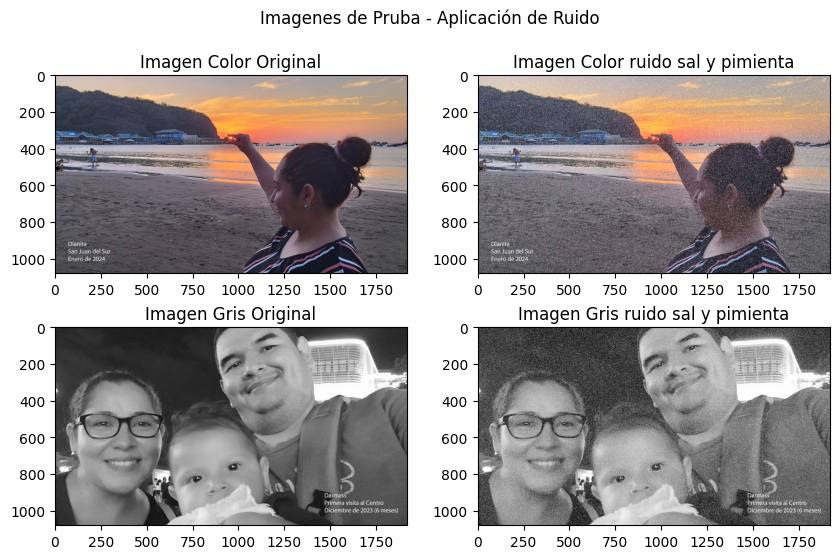

In [201]:
# Generacion de funciones para trabajar imagenes

def AgregarSalPimienta(imagenAModificar,nivelSal,nivelPimienta):
    '''
    La funcion permite agregar el ruido de tipo Sal y Pimienta, se requerira una 
    imagen a modificar. El nivel de probabilidad para gregar sal (Puntos Blancos) 
    y el nivel de probabilidad para agregar pimienta (Puntos Negros)

    ImagenAModificar    Imagen Original
    NivelSal            Nivel para la aplicación de Sal o puntos blancos
    NivelPimienta       Nivel para la aplicación de Pimienta o puntos negros
    '''
    imgSalPimienta = np.copy(imagenAModificar)
    f = imagenAModificar.shape[0]
    c = imagenAModificar.shape[1]

    for i in range(f):
        for j in range(c):
            rand = np.random.rand()
            if rand < nivelSal:
                imgSalPimienta[i, j] = 255
            elif rand < nivelPimienta:
                imgSalPimienta[i, j] = 0
    
    return imgSalPimienta

Imagen_Color_ConRuido = AgregarSalPimienta(Imagen_Color, 0.1, 0.1)
Imagen_Gris_ConRuido = AgregarSalPimienta(Imagen_Gris, 0.1, 0.1)

#Imagen_Color_ConRuido(imgtest,"Imagen a Colores")
ShowImgDashboard(
        tituloDashboard="Imagenes de Pruba - Aplicación de Ruido", 
        columnas=2, 
        ListaImagenes=[
            Imagen_Color,Imagen_Color_ConRuido,
            Imagen_Gris,Imagen_Gris_ConRuido
                       ], 
        TitulosImagen=[
            "Imagen Color Original", "Imagen Color ruido sal y pimienta",
            "Imagen Gris Original", "Imagen Gris ruido sal y pimienta"
                       ]
                )

## Eliminación de ruido

### 1.	Objetivo

### 2. Técnica 1(propia)

#### a. Breve descripción de la técnica y sus características
El concepto del filtro de la mediana, es que evalua los pixceles vecinos (Kernel) y genera una sustitucion del pixel basado en la mediana de los pixeles vecinos. Este filtro es ideal para tratar imágenes con ruido de Sal y Pimienta. 

El script generado para su aplicación primero ejecutará un bucle para evaluar cada capa de la imagen y aplicar el filtro, con este bucle si la imagen es blanco y negro, se ejecutara una sola vez y en el caso de una imagen a color se ejecutará tres veces. El script ejecutara un corrido pixel por pixcel y evaluara los pixeceles vecinos, segun el parametro del kernel. El pixcel evaluado será sstituido por la mediana del grupo de vecinos. Al final se combinará los canales de la imagen.

#### b.	Recorte de pantalla del código documentado o código en Jupyter documentado

FiltroMedianaPropio: 1m48s
FiltroMedianaPropio: 0m36s


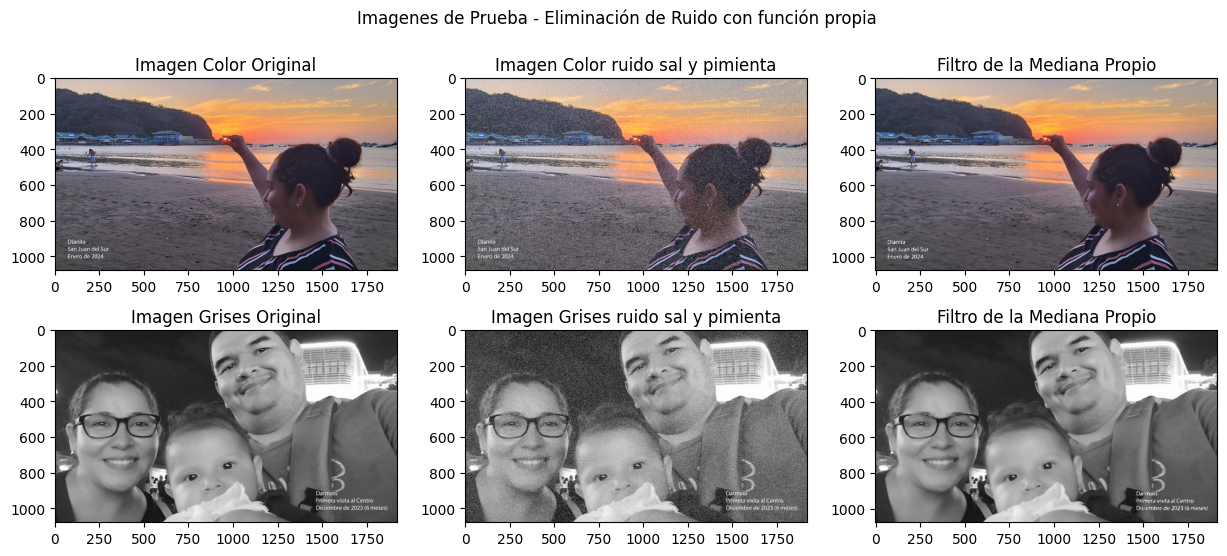

In [202]:
# Filtro de la mediana con código propio

@medirTiempo
def FiltroMedianaPropio(imagen, tamañoKernel):
    '''
    Aplicará un filtrado de la mediana a una imágen.
    '''
    #timeStart = time.time()
    # Separar la imagen en canales de color 
    canales = cv.split(imagen) 
    canales_filtrados = [] 
    
    # Aplicar el filtro de mediana a cada canal 
    for canal in canales: 
        borde = tamañoKernel // 2 
        filas = canal.shape[0] 
        cols = canal.shape[1] 
        canal_filtrado = np.zeros((filas - 2 * borde, cols - 2 * borde), dtype=np.uint8) 
        
        for i in range(borde, filas - borde): 
            for j in range(borde, cols - borde): 
                ventana = canal[i - borde:i + borde + 1, j - borde:j + borde + 1] 
                canal_filtrado[i - borde, j - borde] = np.median(ventana) 
                
        canales_filtrados.append(canal_filtrado)
                
    # Combinar los canales filtrados 
    imagen_filtrada = cv.merge(canales_filtrados) 
    
    #timeEnd = time.time()
    #print((timeEnd-timeStart)/60)
    return imagen_filtrada

Imagen_Color_FiltroMedianaPropio = FiltroMedianaPropio(Imagen_Color_ConRuido,5)
Imagen_Gris_FiltroMedianaPropio = FiltroMedianaPropio(Imagen_Gris_ConRuido,5)

ShowImgDashboard(
        tituloDashboard="Imagenes de Prueba - Eliminación de Ruido con función propia", 
        columnas=3, 
        ListaImagenes=[
            Imagen_Color, Imagen_Color_ConRuido, Imagen_Color_FiltroMedianaPropio,
            Imagen_Gris, Imagen_Gris_ConRuido, Imagen_Gris_FiltroMedianaPropio
                       ], 
        TitulosImagen=[
            "Imagen Color Original", "Imagen Color ruido sal y pimienta", "Filtro de la Mediana Propio",
            "Imagen Grises Original", "Imagen Grises ruido sal y pimienta", "Filtro de la Mediana Propio"
                       ]
                )


### 3. Técnica 2  (OpenCV)

#### a. Breve descripción de la técnica y sus características
OpenCV ofrece la función cv2.medianBlur, la cual aplica un filtro de mediana que es particularmente eficaz para la eliminación del ruido sal y pimienta, manteniendo intactos los bordes de la imagen. Si bien, el filtro es ya un método de la biblioteca, se creará una función para aplicarlo, para evaluar el tiempo de ejecución.

#### b. Recorte de pantalla del código documentado o código en Jupyter documentado

FiltroMedianaOpenCv: 0m0s
FiltroMedianaOpenCv: 0m0s


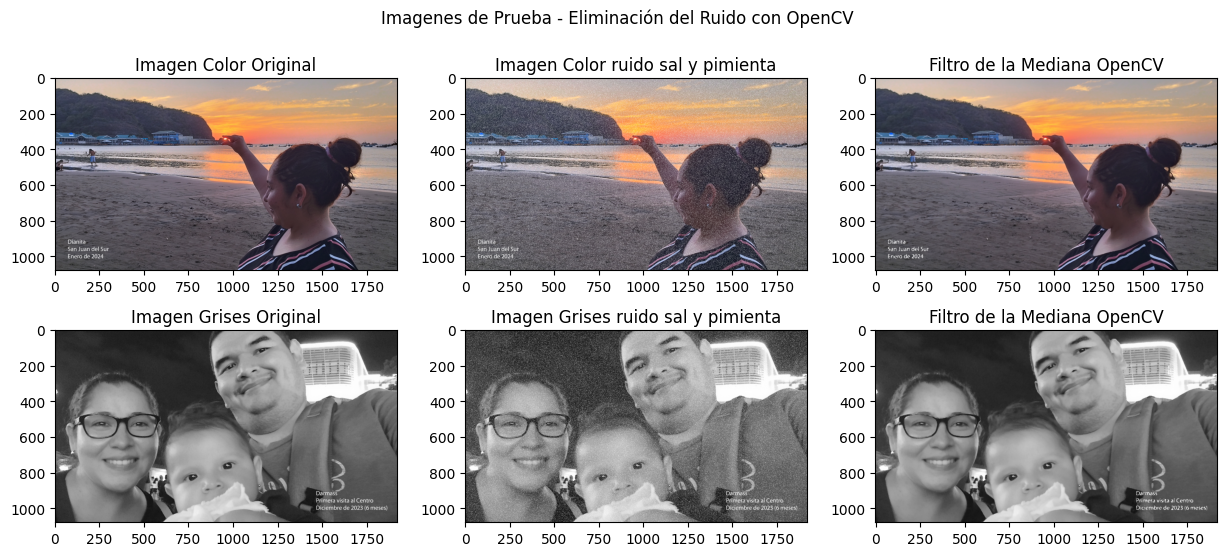

In [203]:
# Filtro de la mediana con OpenCV

@medirTiempo
def FiltroMedianaOpenCv(Imagen,Kernel):
    return cv.medianBlur(Imagen,Kernel)

Imagen_Color_FiltroMedianaCV = FiltroMedianaOpenCv(Imagen_Color_ConRuido, 5)
Imagen_Grises_FiltroMedianaCV = FiltroMedianaOpenCv(Imagen_Gris_ConRuido, 5)

ShowImgDashboard(
        tituloDashboard="Imagenes de Prueba - Eliminación del Ruido con OpenCV", 
        columnas=3, 
        ListaImagenes=[
            Imagen_Color, Imagen_Color_ConRuido, Imagen_Color_FiltroMedianaCV,
            Imagen_Gris, Imagen_Gris_ConRuido, Imagen_Grises_FiltroMedianaCV
                       ], 
        TitulosImagen=[
            "Imagen Color Original", "Imagen Color ruido sal y pimienta", "Filtro de la Mediana OpenCV",
            "Imagen Grises Original", "Imagen Grises ruido sal y pimienta", "Filtro de la Mediana OpenCV"
                       ]
                )

### 4. Desempeño. 
Para la evalación del desempeño se ha identificado la medida de Error Cuadrático Medio (MSE). El propósito principal de la MSE es cuantificar la diferencia entre los valores predichos o filtrados y los valores reales o de referencia. Esto se hace calculando el promedio de los cuadrados de las diferencias entre estos valores. La MSE proporciona una medida de la calidad de un filtro o modelo en términos de su capacidad para aproximarse a los valores reales.

_Interpretación_
- Valor Bajo de MSE: Indica que el filtro o modelo tiene un buen desempeño y que las diferencias entre los valores predichos y los valores reales son pequeñas.
- Valor Alto de MSE: Suele indicar que el filtro o modelo tiene un mal desempeño y que hay grandes diferencias entre los valores predichos y los valores reales.

Al comparar los valores de MSE de diferentes métodos, el método con el MSE más bajo es considerado el mejor.

In [204]:
def calcular_mse(imagen_original, imagen_filtrada):
    # Calcula la diferencia entre las imágenes
    diferencia = imagen_original - imagen_filtrada
    # Eleva al cuadrado las diferencias
    cuadrado_diferencia = np.square(diferencia)
    # Calcula el promedio de los valores
    mse = np.mean(cuadrado_diferencia)
    return mse

# Calcular el MSE
mse_color_manual = calcular_mse(Imagen_Color[2:-2, 2:-2], Imagen_Color_FiltroMedianaPropio)
mse_color_opencv = calcular_mse(Imagen_Color, Imagen_Color_FiltroMedianaCV)

mse_gris_manual = calcular_mse(Imagen_Gris[2:-2, 2:-2], Imagen_Gris_FiltroMedianaPropio)
mse_gris_opencv = calcular_mse(Imagen_Gris, Imagen_Grises_FiltroMedianaCV)

# Mostrar los resultados
print(f'mse_color_manual: {mse_color_manual}')
print(f'mse_color_opencv: {mse_color_opencv}')

print(f'mse_gris_manual: {mse_gris_manual}')
print(f'mse_gris_opencv: {mse_gris_opencv}')

mse_color_manual: 20.590259776796454
mse_color_opencv: 20.5403420781893
mse_gris_manual: 7.570264297521944
mse_gris_opencv: 7.582874710648148


### 5. Resultados de imágenes.

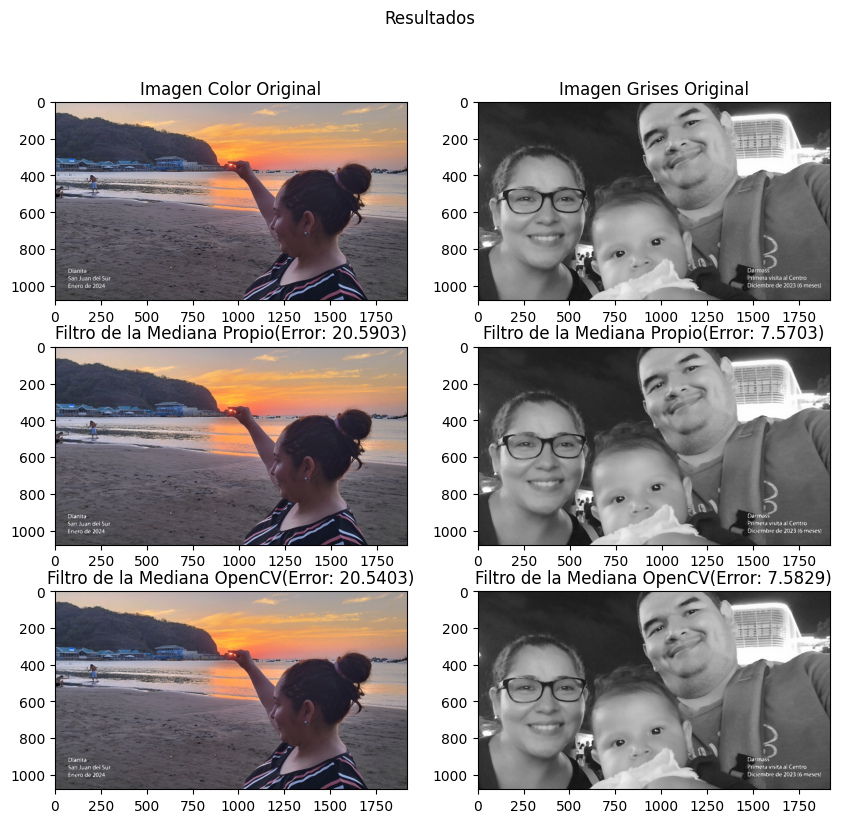

In [205]:
ShowImgDashboard(
        tituloDashboard="Resultados", 
        columnas=2, 
        ListaImagenes=[
            Imagen_Color, Imagen_Gris, 
            Imagen_Color_FiltroMedianaPropio, Imagen_Gris_FiltroMedianaPropio,
            Imagen_Color_FiltroMedianaCV, Imagen_Grises_FiltroMedianaCV
                       ], 
        TitulosImagen=[
            "Imagen Color Original", "Imagen Grises Original", 
            f"Filtro de la Mediana Propio(Error: {round(mse_color_manual,4)})", f"Filtro de la Mediana Propio(Error: {round(mse_gris_manual,4)})",
            f"Filtro de la Mediana OpenCV(Error: {round(mse_color_opencv,4)})", f"Filtro de la Mediana OpenCV(Error: {round(mse_gris_opencv,4)})"
                       ]
                )


### 6. Conclusiones sobre eliminación de ruido. 
Se realizaron una serie de pruebas para evaluar los resultados en diferentes tipos de imágenes, al revisar las evaluaciones del MSE, en su mayoría se se muestra un mejor desempeño en el algoritmo de OpenCV. En las tablas de resultado, se ha resaltado en negrito el valor de menor error en cada caso.

Imagen Color
| Caso | Propio | OpenCV |
| ----------- | ----------- | ----------- |
| Baja Resolución |37.0486| **36.9108** |
| Alta Resolución |20.5903| **20.5403** |
| UHD |9.4061| **9.2420** |

Imagen Grises
| Caso | Propio | OpenCV |
| ----------- | ----------- | ----------- |
| Baja Resolución |30.1275| **29.9375**|
| Alta Resolución |**7.5703**| 7.5829 |
| UHD |9.2598| **9.2420** |

Adicional en todos los casos se ha hecho una evaluación del tiempo de ejecución, en todos los casos OpenCV se demoró solo unos segundos en ejecutar la aplicación del filtro. En el caso del algoritmo propio, se registraron tiempo altos de ejecución que llegarón hasta casi 6 minutos en imágenes UHD.

En base a las experiencias, se llego a las siguientes conclusiones:
- La experiencia en la desempeño del los métodos de OpenCV es mejor, que el algoritmo propio que ejecutan el proceso manual. 
- Los tiempos de ejecución de OpenCV son considerablemente mejores en comparación a los algoritmos propios, esto sin afectar el desempeño del mismo.


## Referencias Bibliográficas
1. OpenCV. (s.f.). Tutorial sobre el filtro de desenfoque Gaussiano, filtro de la mediana y filtro bilateral. Recuperado de https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html
2. DataLo Tech. (2024, 25 de junio). Python para IA: Visión por computadora - Eliminación de ruido en imágenes. Recuperado de https://www.datelo.tech/blog/python-para-ia-4/vision-por-computadora-eliminacion-de-ruido-en-imagenes-3
3. García, C. (2020, 20 de enero). El error cuadrático medio: ¿Qué le dice y cómo interpretarlo? ShallBD. Recuperado de https://shallbd.com/es/el-error-cuadratico-medio-que-le-dice-y-como-interpreterlo/
4. El libro de Python. (2021, 6 de enero). Tiempo de ejecución en Python. Recuperado de https://ellibrodepython.com/tiempo-ejecucion-python

## Acceso a Cuaderno de Jupiter
Se puede acceder al cuaderno de Jupiter en el repositorio de GitHub
